# libraries

In [2]:
# pip install rarfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from zipfile import ZipFile, Path
from rarfile import RarFile, Path
from PIL import Image
import numpy as np
# import fnmatch

# Creating dataframes and saving them as csv files

### if you have already run these cells, you can skip this section

In [25]:
#reading csv files from the zip file and concatenating them as a dataframe also creating related class numbers dataframe
DF_labels= pd.read_csv("trainLabels.csv") 
data=[]
class_df = []
with RarFile("ASM_Features.rar") as zipfiles:

    #the last entry is the zipfile name
    #we'll skip it
    filelist = zipfiles.namelist()[:-1]
        
    for file_name in filelist:
        filelist = zipfiles.namelist()[:-1]

        data.append(pd.read_csv(zipfiles.open(file_name)))
        class_df.append( DF_labels[DF_labels["Id"] == file_name[13:-4] ]["Class"].values[0] )

        
df = pd.concat(data)
class_df = pd.DataFrame(class_df,columns=["Class",])


In [69]:
class_df 

,Class
0,9
1,2
2,9
3,1
4,8
...,...
10863,4
10864,4
10865,4
10866,4


In [28]:
df

,Unnamed: 0,OPcodes,count
0,0,db,1366877
1,1,mov,5295
2,2,push,3208
3,3,call,1533
4,4,jmp,730
...,...,...,...
64,64,movzx,1
65,65,fst,1
66,66,mul,1
67,67,jge,1


In [30]:
#extracting all the unique OPcodes from all the files
col = df['OPcodes'].unique()
# d = pd.DataFrame(0, index=np.arange(1), columns=col)

In [148]:
col.tolist() 

['db',
 'mov',
 'push',
 'call',
 'jmp',
 'test',
 'cmp',
 'sub',
 'add',
 'jz',
 'pop',
 'align',
 'dd',
 'xor',
 'jge',
 'lea',
 'jle',
 'retn',
 'or',
 'shl',
 'and',
 'jnz',
 'imul',
 'sar',
 'jl',
 'jg',
 'neg',
 'dec',
 'inc',
 'shr',
 'stmxcsr',
 'setnl',
 'adc',
 'dw',
 'jb',
 'unicode',
 'not',
 'movzx',
 'mul',
 'jbe',
 'jnb',
 'ja',
 'div',
 'sbb',
 'lock',
 'rcr',
 'rcl',
 'rep',
 'les',
 'movlps',
 'int',
 'xchg',
 'retf',
 'arpl',
 'out',
 'ror',
 'in',
 'repne',
 'enter',
 'lds',
 'jnp',
 'loop',
 'fcomp',
 'fimul',
 'js',
 'loopne',
 'jo',
 'jns',
 'movsx',
 'fcom',
 'bound',
 'fistp',
 'fdiv',
 'fsub',
 'jp',
 'sal',
 'aad',
 'fsubr',
 'rol',
 'fld',
 'fstp',
 'pinsrw',
 'setz',
 'seto',
 'idiv',
 'setnz',
 'rclsid',
 'fnstcw',
 'riid',
 'jno',
 'fild',
 'extrn',
 'vmovhps',
 's',
 'fnstsw',
 'fadd',
 'fst',
 'fmul',
 'fdivr',
 'fucomp',
 'fucom',
 'fxch',
 'faddp',
 'fmulp',
 'aam',
 'retnw',
 'fisttp',
 'fisub',
 'jecxz',
 'ficom',
 'fidivr',
 'ficomp',
 'fidiv',
 'f

In [31]:
# creating a data frame which it's columns are all the unique OPcodes and each row contains the count of OPcodes for
# an specific file 

data2=[]

with RarFile("ASM_Features.rar") as zipfiles:
    
    #the last entry is the zipfile name
    #we'll skip it
    filelist = zipfiles.namelist()[:-1]
    for count,file_name in enumerate(filelist):

        temp = pd.read_csv(zipfiles.open(file_name))
        tempt = temp.drop('Unnamed: 0', axis=1).transpose()
        tempt.columns= tempt[0:1].values[0]
        tempt = tempt.drop(["OPcodes"])            
        DATA_FRAME= pd.DataFrame(0, index=np.arange(1), columns=col)
        DATA_FRAME[tempt.columns]=tempt.values
        data2.append(DATA_FRAME)
        print(count,end="\r")

print("out")
DATA_FRAME = pd.concat(data2)
print("out2")

DATA_FRAME.head()

out67
out2


,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,pmxcd,lprect,vcmpss,mpsadbw,phminposuw,vpxor,vpcmpeqd,daa,vpsrlw,stosd
0,1366877,5295,3208,1533,730,674,672,648,622,557,...,0,0,0,0,0,0,0,0,0,0
0,63354,2190,569,333,47,48,218,216,323,54,...,0,0,0,0,0,0,0,0,0,0
0,1226,31,442,125,1,73,127,91,32,44,...,0,0,0,0,0,0,0,0,0,0
0,105,89,81,53,12,14,15,5,11,13,...,0,0,0,0,0,0,0,0,0,0
0,5752,2535,402,194,72,6,182,363,427,78,...,0,0,0,0,0,0,0,0,0,0


In [222]:
DATA_FRAME

,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,pmxcd,lprect,vcmpss,mpsadbw,phminposuw,vpxor,vpcmpeqd,daa,vpsrlw,stosd
0,1366877,5295,3208,1533,730,674,672,648,622,557,...,0,0,0,0,0,0,0,0,0,0
0,63354,2190,569,333,47,48,218,216,323,54,...,0,0,0,0,0,0,0,0,0,0
0,1226,31,442,125,1,73,127,91,32,44,...,0,0,0,0,0,0,0,0,0,0
0,105,89,81,53,12,14,15,5,11,13,...,0,0,0,0,0,0,0,0,0,0
0,5752,2535,402,194,72,6,182,363,427,78,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,264480,152,284,91,2,24,39,46,126,11,...,0,0,0,0,0,0,0,0,0,0
0,41915,281,462,112,286,40,78,100,158,36,...,0,0,0,0,0,0,0,0,0,0
0,44679,134,248,35,149,3,45,21,71,4,...,0,0,0,0,0,0,0,0,0,0
0,75982,512,879,33,1360,78,107,192,270,17,...,0,0,0,0,0,0,0,0,0,0


In [32]:
DATA_FRAME.index = np.arange(DATA_FRAME.shape[0])

In [33]:
DATA_FRAME

,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,pmxcd,lprect,vcmpss,mpsadbw,phminposuw,vpxor,vpcmpeqd,daa,vpsrlw,stosd
0,1366877,5295,3208,1533,730,674,672,648,622,557,...,0,0,0,0,0,0,0,0,0,0
1,63354,2190,569,333,47,48,218,216,323,54,...,0,0,0,0,0,0,0,0,0,0
2,1226,31,442,125,1,73,127,91,32,44,...,0,0,0,0,0,0,0,0,0,0
3,105,89,81,53,12,14,15,5,11,13,...,0,0,0,0,0,0,0,0,0,0
4,5752,2535,402,194,72,6,182,363,427,78,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,264480,152,284,91,2,24,39,46,126,11,...,0,0,0,0,0,0,0,0,0,0
10864,41915,281,462,112,286,40,78,100,158,36,...,0,0,0,0,0,0,0,0,0,0
10865,44679,134,248,35,149,3,45,21,71,4,...,0,0,0,0,0,0,0,0,0,0
10866,75982,512,879,33,1360,78,107,192,270,17,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#saving the mentioned Dataframe
filepath = "DATA_FRAME.csv"
DATA_FRAME.to_csv(filepath)  


In [39]:
#saving Data frame which contains class related to files
filepath = "class_df.csv"
class_df.to_csv(filepath)  


# DATA Final

### if you have already run these cells, you can skip this section

In [38]:
#reading the dataframe of OPcde counts
DF_temp = pd.read_csv("DATA_FRAME.csv") 

In [40]:
#reading dataframe of labels
class_df= pd.read_csv("class_df.csv") 


In [41]:
# adding labels as last column of the main dataframe
DF = pd.concat([DF_temp, class_df], axis=1).drop('Unnamed: 0', axis=1)
DF

,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,lprect,vcmpss,mpsadbw,phminposuw,vpxor,vpcmpeqd,daa,vpsrlw,stosd,Class
0,1366877,5295,3208,1533,730,674,672,648,622,557,...,0,0,0,0,0,0,0,0,0,9
1,63354,2190,569,333,47,48,218,216,323,54,...,0,0,0,0,0,0,0,0,0,2
2,1226,31,442,125,1,73,127,91,32,44,...,0,0,0,0,0,0,0,0,0,9
3,105,89,81,53,12,14,15,5,11,13,...,0,0,0,0,0,0,0,0,0,1
4,5752,2535,402,194,72,6,182,363,427,78,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,264480,152,284,91,2,24,39,46,126,11,...,0,0,0,0,0,0,0,0,0,4
10864,41915,281,462,112,286,40,78,100,158,36,...,0,0,0,0,0,0,0,0,0,4
10865,44679,134,248,35,149,3,45,21,71,4,...,0,0,0,0,0,0,0,0,0,4
10866,75982,512,879,33,1360,78,107,192,270,17,...,0,0,0,0,0,0,0,0,0,4


In [42]:
filepath = "DATA_FRAME_Final.csv"
DF.to_csv(filepath)  

# SPARK

In [2]:
#initializing and starting a pyspark session and transform pandas dataframe to spark dataframe

from pyspark.sql import SparkSession #Import the pyspark
from pyspark.conf import SparkConf #Import the SparkConf
from pyspark.context import SparkContext #Import the SparkContext
import time
from pyspark.sql import SparkSession

DF = pd.read_csv("DATA_FRAME_Final.csv") 
DF = DF.drop('Unnamed: 0', axis=1)
conf = SparkConf()
conf.setMaster("local").setAppName("HW2_1") 
sc = SparkContext.getOrCreate(conf=conf)

#Create PySpark SparkSession
spark= SparkSession.builder.master("local").getOrCreate()

#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(DF) 
# sparkDF.printSchema()
# sparkDF.show()


23/01/01 10:33:19 WARN Utils: Your hostname, ERFAN resolves to a loopback address: 127.0.1.1; using 192.168.51.204 instead (on interface eth0)
23/01/01 10:33:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/01 10:33:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


/home/erfan_wsl/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/home/erfan_wsl/.local/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [3]:
spark

In [48]:
sparkDF_pd = sparkDF.select("*").toPandas()

23/01/01 01:11:06 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/01/01 01:11:07 WARN TaskSetManager: Stage 0 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


In [49]:
sparkDF_pd

,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,lprect,vcmpss,mpsadbw,phminposuw,vpxor,vpcmpeqd,daa,vpsrlw,stosd,Class
0,1366877,5295,3208,1533,730,674,672,648,622,557,...,0,0,0,0,0,0,0,0,0,9
1,63354,2190,569,333,47,48,218,216,323,54,...,0,0,0,0,0,0,0,0,0,2
2,1226,31,442,125,1,73,127,91,32,44,...,0,0,0,0,0,0,0,0,0,9
3,105,89,81,53,12,14,15,5,11,13,...,0,0,0,0,0,0,0,0,0,1
4,5752,2535,402,194,72,6,182,363,427,78,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,264480,152,284,91,2,24,39,46,126,11,...,0,0,0,0,0,0,0,0,0,4
10864,41915,281,462,112,286,40,78,100,158,36,...,0,0,0,0,0,0,0,0,0,4
10865,44679,134,248,35,149,3,45,21,71,4,...,0,0,0,0,0,0,0,0,0,4
10866,75982,512,879,33,1360,78,107,192,270,17,...,0,0,0,0,0,0,0,0,0,4


In [50]:
#count of each class in the dataframe
for i in range(9):
    print("num Total class ",i+1," : ",sum(sparkDF_pd["Class"]==i+1))

num Total class  1  :  1541
num Total class  2  :  2478
num Total class  3  :  2942
num Total class  4  :  475
num Total class  5  :  42
num Total class  6  :  751
num Total class  7  :  398
num Total class  8  :  1228
num Total class  9  :  1013


In [4]:
#spliting the dataframe to TRAIN,TEST,VALID 
TRAIN,TEST,VALID = sparkDF.randomSplit([0.85,0.1,0.05])

In [5]:
#count of each class in the TRAIN dataframe

TRAIN_pd = TRAIN.select("*").toPandas()
for i in range(9):
    print("num TRAIN class ",i+1," : ",sum(TRAIN_pd["Class"]==i+1))

23/01/01 10:37:19 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/01/01 10:37:19 WARN TaskSetManager: Stage 0 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


num TRAIN class  1  :  1327
num TRAIN class  2  :  2126
num TRAIN class  3  :  2491
num TRAIN class  4  :  414
num TRAIN class  5  :  39
num TRAIN class  6  :  645
num TRAIN class  7  :  330
num TRAIN class  8  :  1032
num TRAIN class  9  :  858


In [6]:
#count of each class in the TEST dataframe

TEST_pd = TEST.select("*").toPandas()
for i in range(9):
    print("num TEST class ",i+1," : ",sum(TEST_pd["Class"]==i+1))

23/01/01 10:37:42 WARN TaskSetManager: Stage 1 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


num TEST class  1  :  151
num TEST class  2  :  230
num TEST class  3  :  293
num TEST class  4  :  45
num TEST class  5  :  3
num TEST class  6  :  72
num TEST class  7  :  39
num TEST class  8  :  119
num TEST class  9  :  113


In [7]:
#count of each class in the VALID dataframe

VALID_pd = VALID.select("*").toPandas()
for i in range(9):
    print("num VALID class ",i+1," : ",sum(VALID_pd["Class"]==i+1))

23/01/01 10:37:49 WARN TaskSetManager: Stage 2 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


num VALID class  1  :  63
num VALID class  2  :  122
num VALID class  3  :  158
num VALID class  4  :  16
num VALID class  5  :  0
num VALID class  6  :  34
num VALID class  7  :  29
num VALID class  8  :  77
num VALID class  9  :  42


In [86]:
# print((TRAIN.count(), len(TRAIN.columns)))

22/12/31 13:58:02 WARN TaskSetManager: Stage 42 contains a task of very large size (15679 KiB). The maximum recommended task size is 1000 KiB.


22/12/31 13:58:06 WARN TaskSetManager: Stage 43 contains a task of very large size (15679 KiB). The maximum recommended task size is 1000 KiB.


(9246, 722)


In [10]:
from pyspark.sql.functions import rand 
# TRAIN,TEST,VALID shuffling
TRAIN = TRAIN.orderBy(rand())
TEST = TEST.orderBy(rand())
VALID = VALID.orderBy(rand())

# Preparing inputs for Random Forest

In [11]:
print("Training Dataset Count: " + str(TRAIN.count()))
print("Test Dataset Count: " + str(TEST.count()))
print("Validation Dataset Count: " + str(VALID.count()))

23/01/01 10:38:08 WARN TaskSetManager: Stage 3 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 10:38:10 WARN TaskSetManager: Stage 4 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


Training Dataset Count: 9262
23/01/01 10:38:14 WARN TaskSetManager: Stage 16 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 10:38:15 WARN TaskSetManager: Stage 17 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


Test Dataset Count: 1065
23/01/01 10:38:18 WARN TaskSetManager: Stage 29 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 10:38:19 WARN TaskSetManager: Stage 30 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


Validation Dataset Count: 541


In [13]:
from pyspark.ml.feature import StringIndexer, VectorAssembler


In [15]:

input_cols=VALID_pd.columns[:-1]
output_cols="features"

In [16]:
#adding a features column which contains all the columns as a single list, except labels column, to all dataframes
assembler = VectorAssembler(inputCols=input_cols.to_list(), outputCol=output_cols)
TRAIN = assembler.transform(TRAIN)
TEST = assembler.transform(TEST)
VALID = assembler.transform(VALID)


In [17]:
# you can see the last column here
VALID.select("*").toPandas()


23/01/01 10:39:19 WARN TaskSetManager: Stage 42 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 10:39:20 WARN TaskSetManager: Stage 43 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,vcmpss,mpsadbw,phminposuw,vpxor,vpcmpeqd,daa,vpsrlw,stosd,Class,features
0,986,158,367,172,1,6,1,51,189,1,...,0,0,0,0,0,0,0,0,3,"(986.0, 158.0, 367.0, 172.0, 1.0, 6.0, 1.0, 51..."
1,331,66,152,64,19,14,41,5,7,15,...,0,0,0,0,0,0,0,0,6,"(331.0, 66.0, 152.0, 64.0, 19.0, 14.0, 41.0, 5..."
2,3335549,1138,451,209,83,64,147,101,113,58,...,0,0,0,0,0,0,0,0,2,"(3335549.0, 1138.0, 451.0, 209.0, 83.0, 64.0, ..."
3,519248,2125,2806,967,217,325,548,102,540,361,...,0,0,0,0,0,0,0,0,6,"(519248.0, 2125.0, 2806.0, 967.0, 217.0, 325.0..."
4,1826,38,732,208,2,122,204,257,161,89,...,0,0,0,0,0,0,0,0,9,"(1826.0, 38.0, 732.0, 208.0, 2.0, 122.0, 204.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1048199,1712,681,333,139,172,252,178,192,110,...,0,0,0,0,0,0,0,0,2,"(1048199.0, 1712.0, 681.0, 333.0, 139.0, 172.0..."
537,1043,70,177,78,0,1,3,30,45,1,...,0,0,0,0,0,0,0,0,3,"(1043.0, 70.0, 177.0, 78.0, 0.0, 1.0, 3.0, 30...."
538,1046,71,180,78,1,4,4,28,47,1,...,0,0,0,0,0,0,0,0,3,"(1046.0, 71.0, 180.0, 78.0, 1.0, 4.0, 4.0, 28...."
539,16246,2454,428,136,68,2,209,369,484,77,...,0,0,0,0,0,0,0,0,8,"(16246.0, 2454.0, 428.0, 136.0, 68.0, 2.0, 209..."


# Random Forest | numTrees=10, maxDepth=10

In [64]:
from pyspark.ml.classification import RandomForestClassifier
import time
TIME = []
ACC = []

In [65]:
#building and training a random forest classifier with numTrees=10, maxDepth=10

rf = RandomForestClassifier(numTrees=10, maxDepth=10,featuresCol = "features", labelCol = "Class")
s1 = time.time()
rfModel = rf.fit(TRAIN)
# testing the model
predictions = rfModel.transform(TEST)
s2 = time.time()

# saving the training time in a list for ploting
TIME.append(s2-s1)

23/01/01 12:01:24 WARN TaskSetManager: Stage 669 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:01:25 WARN TaskSetManager: Stage 670 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:01:51 WARN TaskSetManager: Stage 681 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:01:52 WARN TaskSetManager: Stage 682 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:01:54 WARN TaskSetManager: Stage 694 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:01:55 WARN TaskSetManager: Stage 695 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:02:04 WARN DAGScheduler: Broadcasting large task binary with size 1001.4 KiB
23/01/01 12:02:05 WARN DAGScheduler: Broadcasting large task binary with size 1161.2 KiB
23/01/01 12:02:06 WARN TaskSetManager: Stage 769 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:02:07 WARN TaskSetManager: Stage 770 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


In [66]:
# predictions.select("*").toPandas()

In [67]:
predictions.select("Class", "prediction").show(10)

23/01/01 12:04:26 WARN TaskSetManager: Stage 781 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:04:27 WARN TaskSetManager: Stage 782 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


+-----+----------+
|Class|prediction|
+-----+----------+
|    6|       6.0|
|    1|       1.0|
|    4|       4.0|
|    2|       2.0|
|    9|       9.0|
|    3|       3.0|
|    3|       3.0|
|    1|       1.0|
|    9|       9.0|
|    2|       2.0|
+-----+----------+
only showing top 10 rows



In [63]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [68]:
# calculating the accuracy and test error

evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))

# saving the accuracy in a list for ploting

ACC.append(accuracy)

23/01/01 12:04:38 WARN TaskSetManager: Stage 797 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:04:39 WARN TaskSetManager: Stage 798 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


Accuracy = 0.979054122324214
Test Error = 0.02094587767578604


In [69]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

# obtaining the confusion matrix

preds_and_labels = predictions.select(['prediction','Class']).withColumn('Class', F.col('Class').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','Class'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

23/01/01 12:04:54 WARN TaskSetManager: Stage 814 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:04:55 WARN TaskSetManager: Stage 815 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


/home/erfan_wsl/.local/lib/python3.10/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


[[151.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  3. 227.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 290.   2.   0.   1.   0.   0.   0.]
 [  0.   0.   0.  45.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   1.   1.   0.   0.   0.]
 [  2.   0.   0.   0.   0.  69.   0.   1.   0.]
 [  0.   0.   0.   1.   0.   0.  38.   0.   0.]
 [  6.   0.   0.   2.   0.   0.   0. 111.   0.]
 [  1.   0.   0.   0.   0.   1.   0.   0. 111.]]


In [70]:
# Overall statistics
# calculating precision, recall, f1Score, True Positive Rate, False Positive Rate
# mean of these metrics have been calculated just for num_trees=30 becuase it has the best result in accuracy

precision = []
recall = []
f1Score = []
tpr = []
fpr = []

for i in range(9):
    precision.append(metrics.precision(i+1.) )
    recall.append(metrics.recall(i+1.) )
    f1Score.append(metrics.fMeasure(i+1.) )
    tpr.append(metrics.truePositiveRate(i+1.) )
    fpr.append(metrics.falsePositiveRate(i+1.) )
print("Summary Stats")
print("\nPrecision = %s" % precision)
print("\nRecall = %s" % recall)
print("\nF1 Score = %s" % f1Score)
print("\nTrue Positive Rate = %s" % tpr)
print("\nFalse Positive Rate = %s" % fpr)




Summary Stats

Precision = [0.9263803680981595, 0.9956140350877193, 1.0, 0.9, 1.0, 0.9583333333333334, 1.0, 0.9910714285714286, 1.0]

Recall = [1.0, 0.9869565217391304, 0.9897610921501706, 1.0, 0.3333333333333333, 0.9583333333333334, 0.9743589743589743, 0.9327731092436975, 0.9823008849557522]

F1 Score = [0.9617834394904459, 0.9912663755458515, 0.9948542024013721, 0.9473684210526316, 0.5, 0.9583333333333334, 0.9870129870129869, 0.961038961038961, 0.9910714285714286]

True Positive Rate = [1.0, 0.9869565217391304, 0.9897610921501706, 1.0, 0.3333333333333333, 0.9583333333333334, 0.9743589743589743, 0.9327731092436975, 0.9823008849557522]

False Positive Rate = [0.01312910284463895, 0.0011976047904191617, 0.0, 0.004901960784313725, 0.0, 0.0030211480362537764, 0.0, 0.0010570824524312897, 0.0]


# Random Forest | numTrees=20, maxDepth=10

In [61]:
# from pyspark.ml.classification import RandomForestClassifier


In [71]:
rf = RandomForestClassifier(numTrees=20, maxDepth=10,featuresCol = "features", labelCol = "Class")
s1 = time.time()
rfModel = rf.fit(TRAIN)
predictions = rfModel.transform(TEST)
s2 = time.time()
TIME.append(s2-s1)

23/01/01 12:09:58 WARN TaskSetManager: Stage 845 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:09:59 WARN TaskSetManager: Stage 846 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:26 WARN TaskSetManager: Stage 857 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:26 WARN TaskSetManager: Stage 858 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:28 WARN TaskSetManager: Stage 870 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:29 WARN TaskSetManager: Stage 871 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:38 WARN DAGScheduler: Broadcasting large task binary with size 1255.0 KiB
23/01/01 12:10:39 WARN DAGScheduler: Broadcasting large task binary with size 1560.0 KiB
23/01/01 12:10:40 WARN DAGScheduler: Broadcasting large task binary with size 1873.4 KiB
23/01/01 12:10:42 WARN TaskSetManager: Stage 945 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:43 WARN TaskSetManager: Stage 946 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


In [168]:
# predictions.select("*").toPandas()

22/12/31 15:37:49 WARN TaskSetManager: Stage 180 contains a task of very large size (15647 KiB). The maximum recommended task size is 1000 KiB.


22/12/31 15:37:50 WARN TaskSetManager: Stage 181 contains a task of very large size (15647 KiB). The maximum recommended task size is 1000 KiB.


,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,vpcmpeqd,daa,vpsrlw,stosd,Id,Class,features,rawPrediction,probability,prediction
0,1417101,6224,2370,922,918,827,1006,881,826,697,...,0,0,0,0,ecd3A46BQyk2SFJ7IMqb,8,"(1417101.0, 6224.0, 2370.0, 922.0, 918.0, 827....","[0.0, 2.93246389296825, 4.7026962518154285, 5....","[0.0, 0.14662319464841253, 0.23513481259077146...",3.0
1,506008,2092,2741,1041,245,378,546,80,543,462,...,0,0,0,0,iVAMDtFgjQHusEGmWJCT,2,"(506008.0, 2092.0, 2741.0, 1041.0, 245.0, 378....","[0.0, 2.8003635965720712, 4.688393468602078, 5...","[0.0, 0.14001817982860362, 0.23441967343010398...",3.0
2,934683,1236,776,386,270,391,285,180,127,315,...,0,0,0,0,gtiXlab7VqBfK2PYzdx6,3,"(934683.0, 1236.0, 776.0, 386.0, 270.0, 391.0,...","[0.0, 2.8349880509799914, 4.624234393584697, 5...","[0.0, 0.14174940254899956, 0.23121171967923485...",3.0
3,14518,3087,1919,788,468,480,601,139,694,529,...,0,0,0,0,E5LXhtYsZMWfA4ebSVUk,3,"(14518.0, 3087.0, 1919.0, 788.0, 468.0, 480.0,...","[0.0, 2.8443643749834537, 4.482604228622607, 5...","[0.0, 0.14221821874917268, 0.22413021143113038...",3.0
4,76924,489,860,33,1337,69,110,191,266,19,...,0,0,0,0,I2Rtqw5TSvPfYjFkXGKr,8,"(76924.0, 489.0, 860.0, 33.0, 1337.0, 69.0, 11...","[0.0, 2.2545317939040976, 5.491689163622502, 4...","[0.0, 0.1127265896952049, 0.27458445818112515,...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,649,3924,211,305,298,345,367,274,465,253,...,0,0,0,0,6ZO9dMHY5JkCofwTSyvm,1,"(649.0, 3924.0, 211.0, 305.0, 298.0, 345.0, 36...","[0.0, 2.7903251843666257, 4.615526141603453, 5...","[0.0, 0.13951625921833127, 0.23077630708017266...",3.0
1064,173150,5899,3472,1341,746,726,728,816,680,566,...,0,0,0,0,Ei92sQqeJWtwHkcx8ouK,8,"(173150.0, 5899.0, 3472.0, 1341.0, 746.0, 726....","[0.0, 2.936369598391365, 4.73270969923399, 5.3...","[0.0, 0.14681847991956826, 0.23663548496169948...",3.0
1065,7310,2555,407,204,75,11,190,376,426,78,...,0,0,0,0,5FXu1yi9MvKsJIGPC72c,2,"(7310.0, 2555.0, 407.0, 204.0, 75.0, 11.0, 190...","[0.0, 2.8606905950745176, 4.40337991911419, 5....","[0.0, 0.14303452975372585, 0.22016899595570946...",3.0
1066,7905,2295,393,132,71,6,174,327,390,70,...,0,0,0,0,75IA0ztPUf4HQJiacnoW,3,"(7905.0, 2295.0, 393.0, 132.0, 71.0, 6.0, 174....","[0.0, 2.89521599003667, 4.485606767897073, 5.4...","[0.0, 0.1447607995018335, 0.22428033839485365,...",3.0


In [72]:
predictions.select("Class", "prediction").show(10)

23/01/01 12:10:55 WARN TaskSetManager: Stage 957 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:56 WARN TaskSetManager: Stage 958 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:10:58 WARN DAGScheduler: Broadcasting large task binary with size 1478.4 KiB
+-----+----------+
|Class|prediction|
+-----+----------+
|    6|       6.0|
|    1|       1.0|
|    4|       4.0|
|    2|       2.0|
|    9|       9.0|
|    3|       3.0|
|    3|       3.0|
|    1|       1.0|
|    9|       9.0|
|    2|       2.0|
+-----+----------+
only showing top 10 rows



In [63]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [73]:
evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))
ACC.append(accuracy)

23/01/01 12:11:13 WARN TaskSetManager: Stage 973 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:11:14 WARN TaskSetManager: Stage 974 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:11:16 WARN DAGScheduler: Broadcasting large task binary with size 1495.5 KiB
Accuracy = 0.9818416124499808
Test Error = 0.018158387550019195


In [74]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = predictions.select(['prediction','Class']).withColumn('Class', F.col('Class').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','Class'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

23/01/01 12:11:20 WARN TaskSetManager: Stage 990 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:11:21 WARN TaskSetManager: Stage 991 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:11:23 WARN DAGScheduler: Broadcasting large task binary with size 1479.7 KiB
23/01/01 12:11:24 WARN DAGScheduler: Broadcasting large task binary with size 1479.7 KiB
23/01/01 12:11:24 WARN DAGScheduler: Broadcasting large task binary with size 1482.7 KiB
23/01/01 12:11:24 WARN DAGScheduler: Broadcasting large task binary with size 1492.2 KiB
[[151.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  2. 228.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 291.   1.   0.   0.   0.   1.   0.]
 [  0.   0.   0.  45.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   1.   0.   0.   1.   0.]
 [  1.   0.   0.   0.   0.  70.   0.   1.   0.]
 [  0.   0.   0.   1.   0.   0.  38.   0.   0.]
 [  7.   0.   0.   1.   0.   0.   0. 111.   0.]
 [  2.   0.   0.   0.   0.   0.   0.   0. 111.]]


In [75]:
# Overall statistics

precision = []
recall = []
f1Score = []
tpr = []
fpr = []
# metrics.truePositiveRate
# metrics.falsePositiveRate
for i in range(9):
    precision.append(metrics.precision(i+1.) )
    recall.append(metrics.recall(i+1.) )
    f1Score.append(metrics.fMeasure(i+1.) )
    tpr.append(metrics.truePositiveRate(i+1.) )
    fpr.append(metrics.falsePositiveRate(i+1.) )
print("Summary Stats")
print("\nPrecision = %s" % precision)
print("\nRecall = %s" % recall)
print("\nF1 Score = %s" % f1Score)
print("\nTrue Positive Rate = %s" % tpr)
print("\nFalse Positive Rate = %s" % fpr)




Summary Stats

Precision = [0.9207317073170732, 1.0, 1.0, 0.9375, 1.0, 1.0, 1.0, 0.9736842105263158, 1.0]

Recall = [1.0, 0.991304347826087, 0.9931740614334471, 1.0, 0.3333333333333333, 0.9722222222222222, 0.9743589743589743, 0.9327731092436975, 0.9823008849557522]

F1 Score = [0.9587301587301587, 0.9956331877729258, 0.9965753424657535, 0.967741935483871, 0.5, 0.9859154929577464, 0.9870129870129869, 0.9527896995708156, 0.9910714285714286]

True Positive Rate = [1.0, 0.991304347826087, 0.9931740614334471, 1.0, 0.3333333333333333, 0.9722222222222222, 0.9743589743589743, 0.9327731092436975, 0.9823008849557522]

False Positive Rate = [0.014223194748358862, 0.0, 0.0, 0.0029411764705882353, 0.0, 0.0, 0.0, 0.003171247357293869, 0.0]


# Random Forest | numTrees=30, maxDepth=10

In [18]:
# from pyspark.ml.classification import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(numTrees=30, maxDepth=10,featuresCol = "features", labelCol = "Class")
s1 = time.time()
rfModel = rf.fit(TRAIN)
predictions = rfModel.transform(TEST)
s2 = time.time()
TIME.append(s2-s1)

23/01/01 12:12:11 WARN TaskSetManager: Stage 1021 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:12:12 WARN TaskSetManager: Stage 1022 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:12:38 WARN TaskSetManager: Stage 1033 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:12:39 WARN TaskSetManager: Stage 1034 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:12:41 WARN TaskSetManager: Stage 1046 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:12:42 WARN TaskSetManager: Stage 1047 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:12:51 WARN DAGScheduler: Broadcasting large task binary with size 1234.5 KiB
23/01/01 12:12:52 WARN DAGScheduler: Broadcasting large task binary with size 1637.3 KiB
23/01/01 12:12:53 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB
23/01/01 12:12:54 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB


23/01/01 12:12:56 WARN TaskSetManager: Stage 1121 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:12:57 WARN TaskSetManager: Stage 1122 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


In [77]:
predictions.select("Class", "prediction").show(10)

23/01/01 12:14:01 WARN TaskSetManager: Stage 1133 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:14:02 WARN TaskSetManager: Stage 1134 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:14:04 WARN DAGScheduler: Broadcasting large task binary with size 1966.1 KiB
+-----+----------+
|Class|prediction|
+-----+----------+
|    6|       6.0|
|    1|       1.0|
|    4|       4.0|
|    2|       2.0|
|    9|       9.0|
|    3|       3.0|
|    3|       3.0|
|    1|       1.0|
|    9|       9.0|
|    2|       2.0|
+-----+----------+
only showing top 10 rows



In [21]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [78]:
evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))
ACC.append(accuracy)

23/01/01 12:14:15 WARN TaskSetManager: Stage 1149 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:14:16 WARN TaskSetManager: Stage 1150 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:14:18 WARN DAGScheduler: Broadcasting large task binary with size 1983.3 KiB
Accuracy = 0.9836834345632279
Test Error = 0.016316565436772068


In [79]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = predictions.select(['prediction','Class']).withColumn('Class', F.col('Class').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','Class'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

23/01/01 12:14:32 WARN TaskSetManager: Stage 1166 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:14:33 WARN TaskSetManager: Stage 1167 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:14:35 WARN DAGScheduler: Broadcasting large task binary with size 1967.4 KiB
23/01/01 12:14:35 WARN DAGScheduler: Broadcasting large task binary with size 1967.4 KiB
23/01/01 12:14:36 WARN DAGScheduler: Broadcasting large task binary with size 1970.4 KiB
23/01/01 12:14:36 WARN DAGScheduler: Broadcasting large task binary with size 1979.9 KiB
[[151.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1. 229.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 292.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  44.   0.   1.   0.   0.   0.]
 [  1.   0.   0.   0.   1.   0.   0.   1.   0.]
 [  2.   0.   0.   0.   0.  69.   0.   1.   0.]
 [  0.   0.   0.   1.   0.   0.  38.   0.   0.]
 [  5.   0.   0.   1.   0.   0.   0. 113.   0.]
 [  2.   0.   0.   0.   0.   0.   0.   0. 111.]]


In [80]:
# Overall statistics

precision = []
recall = []
f1Score = []
tpr = []
fpr = []
# metrics.truePositiveRate
# metrics.falsePositiveRate
for i in range(9):
    precision.append(metrics.precision(i+1.) )
    recall.append(metrics.recall(i+1.) )
    f1Score.append(metrics.fMeasure(i+1.) )
    tpr.append(metrics.truePositiveRate(i+1.) )
    fpr.append(metrics.falsePositiveRate(i+1.) )
print("Summary Stats")
print("\nPrecision = %s" % precision)
print("\nRecall = %s" % recall)
print("\nF1 Score = %s" % f1Score)
print("\nTrue Positive Rate = %s" % tpr)
print("\nFalse Positive Rate = %s" % fpr)




Summary Stats

Precision = [0.9320987654320988, 1.0, 1.0, 0.9361702127659575, 1.0, 0.9857142857142858, 1.0, 0.9826086956521739, 1.0]

Recall = [1.0, 0.9956521739130435, 0.9965870307167235, 0.9777777777777777, 0.3333333333333333, 0.9583333333333334, 0.9743589743589743, 0.9495798319327731, 0.9823008849557522]

F1 Score = [0.9648562300319489, 0.9978213507625272, 0.9982905982905983, 0.9565217391304347, 0.5, 0.971830985915493, 0.9870129870129869, 0.9658119658119659, 0.9910714285714286]

True Positive Rate = [1.0, 0.9956521739130435, 0.9965870307167235, 0.9777777777777777, 0.3333333333333333, 0.9583333333333334, 0.9743589743589743, 0.9495798319327731, 0.9823008849557522]

False Positive Rate = [0.012035010940919038, 0.0, 0.0, 0.0029411764705882353, 0.0, 0.0010070493454179255, 0.0, 0.0021141649048625794, 0.0]


In [131]:
# calculaing the means for all the above metrics 

precision_m = np.mean(precision)
recall_m = np.mean(recall)
f1Score_m = np.mean(f1Score)
tpr_m = np.mean(tpr)
fpr_m = np.mean(fpr)

print("Summary mean Stats")
print("\nPrecision = %s" % precision_m)
print("\nRecall = %s" % recall_m)
print("\nF1 Score = %s" % f1Score_m)
print("\nTrue Positive Rate = %s" % tpr_m)
print("\nFalse Positive Rate = %s" % fpr_m)




Summary mean Stats

Precision = 0.9818435510627239

Recall = 0.9075470378135234

F1 Score = 0.9259130317252647

True Positive Rate = 0.9075470378135234

False Positive Rate = 0.0020108224068653086


# Random Forest | numTrees=40, maxDepth=10

In [60]:
# from pyspark.ml.classification import RandomForestClassifier

In [81]:
rf = RandomForestClassifier(numTrees=40, maxDepth=10,featuresCol = "features", labelCol = "Class")
s1 = time.time()
rfModel = rf.fit(TRAIN)
predictions = rfModel.transform(TEST)
s2 = time.time()
TIME.append(s2-s1)

23/01/01 12:15:15 WARN TaskSetManager: Stage 1197 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:15:16 WARN TaskSetManager: Stage 1198 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:15:41 WARN TaskSetManager: Stage 1209 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:15:42 WARN TaskSetManager: Stage 1210 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:15:43 WARN TaskSetManager: Stage 1222 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:15:44 WARN TaskSetManager: Stage 1223 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:15:53 WARN DAGScheduler: Broadcasting large task binary with size 1084.0 KiB


23/01/01 12:15:54 WARN DAGScheduler: Broadcasting large task binary with size 1500.5 KiB


23/01/01 12:15:55 WARN DAGScheduler: Broadcasting large task binary with size 2.0 MiB


23/01/01 12:15:57 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


23/01/01 12:15:58 WARN DAGScheduler: Broadcasting large task binary with size 3.2 MiB


23/01/01 12:16:00 WARN TaskSetManager: Stage 1297 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:16:01 WARN TaskSetManager: Stage 1298 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


In [168]:
# predictions.select("*").toPandas()

22/12/31 15:37:49 WARN TaskSetManager: Stage 180 contains a task of very large size (15647 KiB). The maximum recommended task size is 1000 KiB.


22/12/31 15:37:50 WARN TaskSetManager: Stage 181 contains a task of very large size (15647 KiB). The maximum recommended task size is 1000 KiB.


,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,vpcmpeqd,daa,vpsrlw,stosd,Id,Class,features,rawPrediction,probability,prediction
0,1417101,6224,2370,922,918,827,1006,881,826,697,...,0,0,0,0,ecd3A46BQyk2SFJ7IMqb,8,"(1417101.0, 6224.0, 2370.0, 922.0, 918.0, 827....","[0.0, 2.93246389296825, 4.7026962518154285, 5....","[0.0, 0.14662319464841253, 0.23513481259077146...",3.0
1,506008,2092,2741,1041,245,378,546,80,543,462,...,0,0,0,0,iVAMDtFgjQHusEGmWJCT,2,"(506008.0, 2092.0, 2741.0, 1041.0, 245.0, 378....","[0.0, 2.8003635965720712, 4.688393468602078, 5...","[0.0, 0.14001817982860362, 0.23441967343010398...",3.0
2,934683,1236,776,386,270,391,285,180,127,315,...,0,0,0,0,gtiXlab7VqBfK2PYzdx6,3,"(934683.0, 1236.0, 776.0, 386.0, 270.0, 391.0,...","[0.0, 2.8349880509799914, 4.624234393584697, 5...","[0.0, 0.14174940254899956, 0.23121171967923485...",3.0
3,14518,3087,1919,788,468,480,601,139,694,529,...,0,0,0,0,E5LXhtYsZMWfA4ebSVUk,3,"(14518.0, 3087.0, 1919.0, 788.0, 468.0, 480.0,...","[0.0, 2.8443643749834537, 4.482604228622607, 5...","[0.0, 0.14221821874917268, 0.22413021143113038...",3.0
4,76924,489,860,33,1337,69,110,191,266,19,...,0,0,0,0,I2Rtqw5TSvPfYjFkXGKr,8,"(76924.0, 489.0, 860.0, 33.0, 1337.0, 69.0, 11...","[0.0, 2.2545317939040976, 5.491689163622502, 4...","[0.0, 0.1127265896952049, 0.27458445818112515,...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,649,3924,211,305,298,345,367,274,465,253,...,0,0,0,0,6ZO9dMHY5JkCofwTSyvm,1,"(649.0, 3924.0, 211.0, 305.0, 298.0, 345.0, 36...","[0.0, 2.7903251843666257, 4.615526141603453, 5...","[0.0, 0.13951625921833127, 0.23077630708017266...",3.0
1064,173150,5899,3472,1341,746,726,728,816,680,566,...,0,0,0,0,Ei92sQqeJWtwHkcx8ouK,8,"(173150.0, 5899.0, 3472.0, 1341.0, 746.0, 726....","[0.0, 2.936369598391365, 4.73270969923399, 5.3...","[0.0, 0.14681847991956826, 0.23663548496169948...",3.0
1065,7310,2555,407,204,75,11,190,376,426,78,...,0,0,0,0,5FXu1yi9MvKsJIGPC72c,2,"(7310.0, 2555.0, 407.0, 204.0, 75.0, 11.0, 190...","[0.0, 2.8606905950745176, 4.40337991911419, 5....","[0.0, 0.14303452975372585, 0.22016899595570946...",3.0
1066,7905,2295,393,132,71,6,174,327,390,70,...,0,0,0,0,75IA0ztPUf4HQJiacnoW,3,"(7905.0, 2295.0, 393.0, 132.0, 71.0, 6.0, 174....","[0.0, 2.89521599003667, 4.485606767897073, 5.4...","[0.0, 0.1447607995018335, 0.22428033839485365,...",3.0


In [82]:
predictions.select("Class", "prediction").show(10)

23/01/01 12:17:51 WARN TaskSetManager: Stage 1309 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:17:52 WARN TaskSetManager: Stage 1310 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:17:54 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
+-----+----------+
|Class|prediction|
+-----+----------+
|    6|       6.0|
|    1|       1.0|
|    4|       4.0|
|    2|       2.0|
|    9|       9.0|
|    3|       3.0|
|    3|       3.0|
|    1|       1.0|
|    9|       9.0|
|    2|       2.0|
+-----+----------+
only showing top 10 rows



In [63]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [83]:
evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))
ACC.append(accuracy)

23/01/01 12:18:03 WARN TaskSetManager: Stage 1325 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:18:04 WARN TaskSetManager: Stage 1326 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:18:05 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
Accuracy = 0.9827820210291215
Test Error = 0.01721797897087851


In [84]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = predictions.select(['prediction','Class']).withColumn('Class', F.col('Class').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','Class'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

23/01/01 12:18:25 WARN TaskSetManager: Stage 1342 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:18:26 WARN TaskSetManager: Stage 1343 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:18:30 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/01/01 12:18:30 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/01/01 12:18:31 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/01/01 12:18:31 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
[[151.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  1. 229.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 291.   1.   0.   1.   0.   0.   0.]
 [  0.   0.   0.  45.   0.   0.   0.   0.   0.]
 [  1.   0.   0.   0.   1.   0.   0.   1.   0.]
 [  2.   0.   0.   1.   0.  69.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.  38.   0.   0.]
 [  6.   0.   0.   1.   0.   0.   0. 112.   0.]
 [  2.   0.   0.   0.   0.   0.   0.   0. 111.]]


In [85]:
# Overall statistics

precision = []
recall = []
f1Score = []
tpr = []
fpr = []
# metrics.truePositiveRate
# metrics.falsePositiveRate
for i in range(9):
    precision.append(metrics.precision(i+1.) )
    recall.append(metrics.recall(i+1.) )
    f1Score.append(metrics.fMeasure(i+1.) )
    tpr.append(metrics.truePositiveRate(i+1.) )
    fpr.append(metrics.falsePositiveRate(i+1.) )
print("Summary Stats")
print("\nPrecision = %s" % precision)
print("\nRecall = %s" % recall)
print("\nF1 Score = %s" % f1Score)
print("\nTrue Positive Rate = %s" % tpr)
print("\nFalse Positive Rate = %s" % fpr)




Summary Stats

Precision = [0.9263803680981595, 1.0, 1.0, 0.9183673469387755, 1.0, 0.9857142857142858, 1.0, 0.9911504424778761, 1.0]

Recall = [1.0, 0.9956521739130435, 0.9931740614334471, 1.0, 0.3333333333333333, 0.9583333333333334, 0.9743589743589743, 0.9411764705882353, 0.9823008849557522]

F1 Score = [0.9617834394904459, 0.9978213507625272, 0.9965753424657535, 0.9574468085106383, 0.5, 0.971830985915493, 0.9870129870129869, 0.9655172413793104, 0.9910714285714286]

True Positive Rate = [1.0, 0.9956521739130435, 0.9931740614334471, 1.0, 0.3333333333333333, 0.9583333333333334, 0.9743589743589743, 0.9411764705882353, 0.9823008849557522]

False Positive Rate = [0.01312910284463895, 0.0, 0.0, 0.00392156862745098, 0.0, 0.0010070493454179255, 0.0, 0.0010570824524312897, 0.0]


# Random Forest | numTrees=50, maxDepth=10

In [60]:
# from pyspark.ml.classification import RandomForestClassifier

In [86]:
rf = RandomForestClassifier(numTrees=50, maxDepth=10,featuresCol = "features", labelCol = "Class")
s1 = time.time()
rfModel = rf.fit(TRAIN)
predictions = rfModel.transform(TEST)
s2 = time.time()
TIME.append(s2-s1)

23/01/01 12:19:55 WARN TaskSetManager: Stage 1373 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:19:56 WARN TaskSetManager: Stage 1374 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:20:24 WARN TaskSetManager: Stage 1385 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:20:25 WARN TaskSetManager: Stage 1386 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:20:26 WARN TaskSetManager: Stage 1398 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:20:27 WARN TaskSetManager: Stage 1399 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:20:36 WARN DAGScheduler: Broadcasting large task binary with size 1235.8 KiB


23/01/01 12:20:37 WARN DAGScheduler: Broadcasting large task binary with size 1745.2 KiB


23/01/01 12:20:39 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/01/01 12:20:40 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


23/01/01 12:20:42 WARN DAGScheduler: Broadcasting large task binary with size 3.9 MiB


23/01/01 12:20:45 WARN TaskSetManager: Stage 1473 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:20:46 WARN TaskSetManager: Stage 1474 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


In [168]:
# predictions.select("*").toPandas()

22/12/31 15:37:49 WARN TaskSetManager: Stage 180 contains a task of very large size (15647 KiB). The maximum recommended task size is 1000 KiB.


22/12/31 15:37:50 WARN TaskSetManager: Stage 181 contains a task of very large size (15647 KiB). The maximum recommended task size is 1000 KiB.


,db,mov,push,call,jmp,test,cmp,sub,add,jz,...,vpcmpeqd,daa,vpsrlw,stosd,Id,Class,features,rawPrediction,probability,prediction
0,1417101,6224,2370,922,918,827,1006,881,826,697,...,0,0,0,0,ecd3A46BQyk2SFJ7IMqb,8,"(1417101.0, 6224.0, 2370.0, 922.0, 918.0, 827....","[0.0, 2.93246389296825, 4.7026962518154285, 5....","[0.0, 0.14662319464841253, 0.23513481259077146...",3.0
1,506008,2092,2741,1041,245,378,546,80,543,462,...,0,0,0,0,iVAMDtFgjQHusEGmWJCT,2,"(506008.0, 2092.0, 2741.0, 1041.0, 245.0, 378....","[0.0, 2.8003635965720712, 4.688393468602078, 5...","[0.0, 0.14001817982860362, 0.23441967343010398...",3.0
2,934683,1236,776,386,270,391,285,180,127,315,...,0,0,0,0,gtiXlab7VqBfK2PYzdx6,3,"(934683.0, 1236.0, 776.0, 386.0, 270.0, 391.0,...","[0.0, 2.8349880509799914, 4.624234393584697, 5...","[0.0, 0.14174940254899956, 0.23121171967923485...",3.0
3,14518,3087,1919,788,468,480,601,139,694,529,...,0,0,0,0,E5LXhtYsZMWfA4ebSVUk,3,"(14518.0, 3087.0, 1919.0, 788.0, 468.0, 480.0,...","[0.0, 2.8443643749834537, 4.482604228622607, 5...","[0.0, 0.14221821874917268, 0.22413021143113038...",3.0
4,76924,489,860,33,1337,69,110,191,266,19,...,0,0,0,0,I2Rtqw5TSvPfYjFkXGKr,8,"(76924.0, 489.0, 860.0, 33.0, 1337.0, 69.0, 11...","[0.0, 2.2545317939040976, 5.491689163622502, 4...","[0.0, 0.1127265896952049, 0.27458445818112515,...",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,649,3924,211,305,298,345,367,274,465,253,...,0,0,0,0,6ZO9dMHY5JkCofwTSyvm,1,"(649.0, 3924.0, 211.0, 305.0, 298.0, 345.0, 36...","[0.0, 2.7903251843666257, 4.615526141603453, 5...","[0.0, 0.13951625921833127, 0.23077630708017266...",3.0
1064,173150,5899,3472,1341,746,726,728,816,680,566,...,0,0,0,0,Ei92sQqeJWtwHkcx8ouK,8,"(173150.0, 5899.0, 3472.0, 1341.0, 746.0, 726....","[0.0, 2.936369598391365, 4.73270969923399, 5.3...","[0.0, 0.14681847991956826, 0.23663548496169948...",3.0
1065,7310,2555,407,204,75,11,190,376,426,78,...,0,0,0,0,5FXu1yi9MvKsJIGPC72c,2,"(7310.0, 2555.0, 407.0, 204.0, 75.0, 11.0, 190...","[0.0, 2.8606905950745176, 4.40337991911419, 5....","[0.0, 0.14303452975372585, 0.22016899595570946...",3.0
1066,7905,2295,393,132,71,6,174,327,390,70,...,0,0,0,0,75IA0ztPUf4HQJiacnoW,3,"(7905.0, 2295.0, 393.0, 132.0, 71.0, 6.0, 174....","[0.0, 2.89521599003667, 4.485606767897073, 5.4...","[0.0, 0.1447607995018335, 0.22428033839485365,...",3.0


In [87]:
predictions.select("Class", "prediction").show(10)

23/01/01 12:21:24 WARN TaskSetManager: Stage 1485 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:21:25 WARN TaskSetManager: Stage 1486 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:21:29 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
+-----+----------+
|Class|prediction|
+-----+----------+
|    6|       6.0|
|    1|       1.0|
|    4|       4.0|
|    2|       2.0|
|    9|       9.0|
|    3|       3.0|
|    3|       3.0|
|    1|       1.0|
|    9|       9.0|
|    2|       2.0|
+-----+----------+
only showing top 10 rows



In [63]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [88]:
evaluator = MulticlassClassificationEvaluator(labelCol="Class", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %s" % (accuracy))
print("Test Error = %s" % (1.0 - accuracy))
ACC.append(accuracy)

23/01/01 12:21:37 WARN TaskSetManager: Stage 1501 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:21:37 WARN TaskSetManager: Stage 1502 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:21:39 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
Accuracy = 0.9818302143699189
Test Error = 0.018169785630081092


In [89]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType
import pyspark.sql.functions as F

preds_and_labels = predictions.select(['prediction','Class']).withColumn('Class', F.col('Class').cast(FloatType())).orderBy('prediction')
preds_and_labels = preds_and_labels.select(['prediction','Class'])
metrics = MulticlassMetrics(preds_and_labels.rdd.map(tuple))
print(metrics.confusionMatrix().toArray())

23/01/01 12:21:44 WARN TaskSetManager: Stage 1518 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:21:44 WARN TaskSetManager: Stage 1519 contains a task of very large size (15403 KiB). The maximum recommended task size is 1000 KiB.


23/01/01 12:21:46 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
23/01/01 12:21:47 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
23/01/01 12:21:47 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
23/01/01 12:21:48 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
[[151.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  2. 228.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 291.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0.  45.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   2.   0.]
 [  3.   0.   0.   0.   0.  68.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.  39.   0.   0.]
 [  6.   0.   0.   0.   0.   0.   1. 112.   0.]
 [  2.   0.   0.   0.   0.   0.   0.   0. 111.]]


In [90]:
# Overall statistics

precision = []
recall = []
f1Score = []
tpr = []
fpr = []
# metrics.truePositiveRate
# metrics.falsePositiveRate
for i in range(9):
    precision.append(metrics.precision(i+1.) )
    recall.append(metrics.recall(i+1.) )
    f1Score.append(metrics.fMeasure(i+1.) )
    tpr.append(metrics.truePositiveRate(i+1.) )
    fpr.append(metrics.falsePositiveRate(i+1.) )
print("Summary Stats")
print("\nPrecision = %s" % precision)
print("\nRecall = %s" % recall)
print("\nF1 Score = %s" % f1Score)
print("\nTrue Positive Rate = %s" % tpr)
print("\nFalse Positive Rate = %s" % fpr)




Summary Stats

Precision = [0.9207317073170732, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9512195121951219, 0.9655172413793104, 1.0]

Recall = [1.0, 0.991304347826087, 0.9931740614334471, 1.0, 0.3333333333333333, 0.9444444444444444, 1.0, 0.9411764705882353, 0.9823008849557522]

F1 Score = [0.9587301587301587, 0.9956331877729258, 0.9965753424657535, 1.0, 0.5, 0.9714285714285714, 0.975, 0.9531914893617022, 0.9910714285714286]

True Positive Rate = [1.0, 0.991304347826087, 0.9931740614334471, 1.0, 0.3333333333333333, 0.9444444444444444, 1.0, 0.9411764705882353, 0.9823008849557522]

False Positive Rate = [0.014223194748358862, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001949317738791423, 0.004228329809725159, 0.0]


# ACC and time plots

In [91]:
TIME

[60.8727753162384,
 58.80563688278198,
 61.73721790313721,
 63.06793761253357,
 67.4094226360321]

In [92]:
ACC

[0.979054122324214,
 0.9818416124499808,
 0.9836834345632279,
 0.9827820210291215,
 0.9818302143699189]

In [93]:
TREES = [10, 20, 30, 40, 50]
TREES

[10, 20, 30, 40, 50]

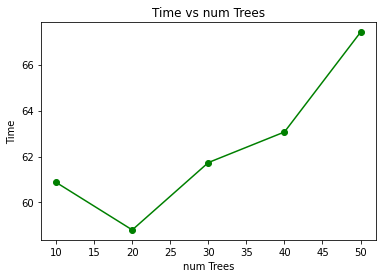

In [111]:
# plotting the duration of training for each num_trees in experiments

import matplotlib.pyplot as plt
plt.plot(TREES, TIME,"go-")
plt.title("Time vs num Trees")
plt.xlabel("num Trees")
plt.ylabel("Time")
plt.savefig("Time vs num_Trees.png")

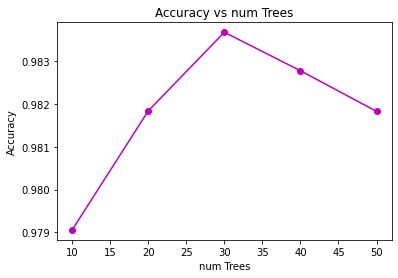

In [124]:
# plotting the the accuracy of models for each num_trees in experiments

plt.plot(TREES, ACC,"mo-")
plt.title("Accuracy vs num Trees")
plt.xlabel("num Trees")
plt.ylabel("Accuracy")
plt.savefig("Accuracy vs num_Trees.png")